#### https://github.com/ashishpowani/Fifa_18_Complete_Player_Data_Analysis/blob/master/Fifa_2018_Analysis.ipynb

### Fifa_2018_Analysis

Table of Contents:¶
• Data Preprocessing

• Exploratory Data Analysis

1) How does the avg. overall ratings, avg. growth ratings and avg. potential ratings trend for all ages?
2) Frequency distribution of players on their overall rating 3) Clubs with most players having an overall rating more than 85 4) Does overall and potential ratings have an influence on wage and value of the player? 5) Determining the average age of players in each club 6) View stats of your favorite club 7) Which teams pays the highest wages to its players? 8) Players that get the highest wages 9) Which countries have the most number of players? 10) Teams that are most powerful (based on overall and potential rating) 11) Top players based on Overall rating 12) Does age have an influence in Overall rating? 13) Does age have an influence in Potential or Growth rating? 14) Distribution of preferred positions?

• Data normalization

• Build a predective model to predict target variable (attack vs defend positions) with logistic regression

• Build a predective model to predict target variable (attack vs defend positions) with Random Forest

• Build a predictive model to predict target variable (attack vs defend positions) with Neural Network

• Conclusion

• Future Scope

In [38]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#### Load Dataset

In [39]:
df=pd.read_csv('CompleteDataset.csv',low_memory=False)

In [40]:
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.shape

(17981, 75)

In [42]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

#### Data Preprocessing

In [43]:
#Drop the column 'Unnmaed:0' [Not requried]
#df=df.drop(['Unnamed:0'],axis=1)

In [44]:

# Function to remove characters 'K', 'M' and '€' from the data
def remove_char_from(value):
    out = value.replace('€','')
    if 'K' in out:
        out = float(out.replace('K',''))*1000
    elif 'M' in out:
        out = float(out.replace('M',''))*1000000
    return float(out)

In [45]:
# Remove the characters from wage and value columns and convert them to numeric column
df['Wage'] = [remove_char_from(x) for x in df.Wage]
df['Value'] = [remove_char_from(x) for x in df.Value]

In [46]:
df.dtypes
df.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [47]:
subset_df = df[['Name', 'Age', 'Nationality', 'Overall', 'Wage', 'Potential', 'Club', 'Value', 'Preferred Positions']]

In [48]:
subset_df.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK


#### Data Cleaning

In [49]:
# Finding null value columns
subset_df.isnull().sum()

Name                     0
Age                      0
Nationality              0
Overall                  0
Wage                     0
Potential                0
Club                   248
Value                    0
Preferred Positions      0
dtype: int64

In [50]:
#Remove null value rows/players
subset_df = subset_df.dropna()
subset_df.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK


#### Feature Engineering

In [51]:
subset_df['Growth']=subset_df['Potential']

In [52]:
subset_df.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions,Growth
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW,94
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW,93
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW,94
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST,92
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK,92


#### 1) How does the avg. overall ratings, avg. growth ratings and avg. potential ratings trend for all ages?

In [53]:
subset_df.Age.unique()

array([32, 30, 25, 31, 28, 26, 27, 29, 39, 23, 24, 35, 33, 34, 36, 21, 22,
       18, 20, 19, 37, 38, 40, 17, 44, 41, 16, 43, 47])

In [57]:
age = subset_df.sort_values("Age")['Age'].unique()
fifa_growth = subset_df.groupby(['Age'])['Growth'].mean()
fifa_potential = subset_df.groupby(['Age'])['Potential'].mean()
fifa_overall = subset_df.groupby(['Age'])['Overall'].mean()
frames = [fifa_growth, fifa_potential, fifa_overall]
summary_result = pd.concat(frames,axis=1)

In [58]:
summary_result.head(10)

,Growth,Potential,Overall
Age,,,
16,76.538462,76.538462,57.846154
17,73.492248,73.492248,56.089147
18,72.654762,72.654762,57.287202
19,72.806754,72.806754,59.420263
20,72.719935,72.719935,61.563358
21,72.805947,72.805947,63.406103
22,72.555217,72.555217,64.780655
23,72.504734,72.504734,66.125273
24,72.113379,72.113379,67.202570


<Figure size 432x288 with 0 Axes>

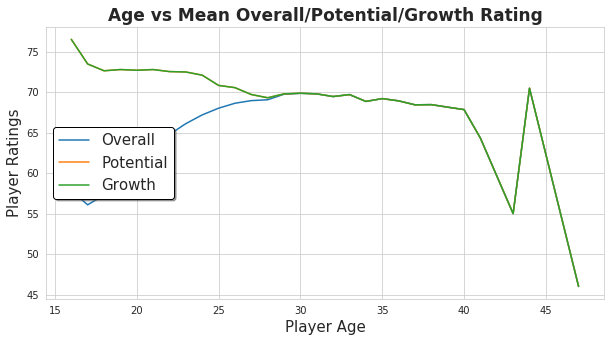

In [59]:
plt.figure()
plt.figure(figsize=(10,5))
plt.title('Age vs Mean Overall/Potential/Growth Rating', fontsize=17, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Ratings', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, fifa_overall, label="Overall")
plt.plot(age, fifa_potential, label="Potential")
plt.plot(age, fifa_growth, label="Growth")
plt.legend(loc=6, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Inference:
1) Mean Growth ratings decreases gradualy as the player ages and becomes constant from the age 27

2) Mean Overall Ratings increases gradually from 17 , becomes constant from 27-40 and then sharply declines after 40

3) Mean Potential ratings decreases gradually and becomes almost constant until it sharply declines after 40

### 2) Frequency Distribution of players on their overall rating

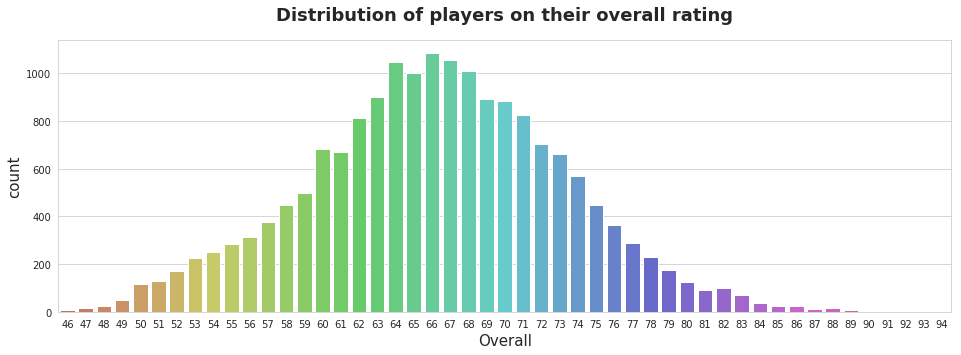

In [60]:
plt.figure(figsize=(16,5))
sns.set_style("whitegrid")
plt.title('Distribution of players on their overall rating', fontsize=18, fontweight='bold', y=1.05,)
plt.xlabel('Overall Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.countplot(x="Overall", data=subset_df, palette="hls");
plt.show()

Inference
Majority of the players (about 1100 players have an overall rating of 66). From the plot, we can say that Overall rating is normally distributed.

### 3) Clubs with most players having an overall rating more than 85

In [62]:
cutoff=85
few_players=subset_df[subset_df['Overall']>cutoff]

In [63]:
few_players.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions,Growth
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW,94
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW,93
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW,94
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST,92
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK,92


In [64]:
No_of_players_in_each_club = few_players.groupby(['Club'])['Overall'].count()
No_of_players_in_each_club_sorted = No_of_players_in_each_club.sort_values(ascending=False)

In [66]:
No_of_players_in_each_club_sorted

Club
FC Bayern Munich       12
Real Madrid CF          8
Chelsea                 6
FC Barcelona            6
Juventus                5
Manchester United       4
Tottenham Hotspur       4
Paris Saint-Germain     4
Manchester City         3
Borussia Dortmund       3
Atlético Madrid         3
Arsenal                 3
Inter                   2
Napoli                  2
Liverpool               1
Roma                    1
Milan                   1
Beşiktaş JK             1
Name: Overall, dtype: int64

#### plot the data

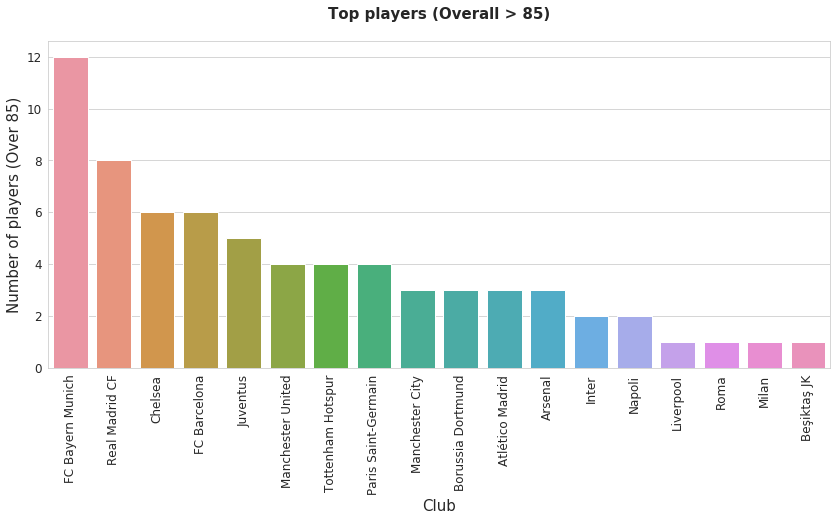

In [67]:

plt.figure(figsize=(14,6))
ax = sns.countplot(x = 'Club', data = few_players, order = No_of_players_in_each_club_sorted.index)

ax.set_xticklabels(labels = No_of_players_in_each_club_sorted.index, rotation='vertical')
ax.set_ylabel('Number of players (Over 85)',fontsize=15)
ax.set_xlabel('Club',fontsize=15)
ax.tick_params(labelsize=12)
ax.set_title('Top players (Overall > %.i)' %cutoff,fontsize=15,fontweight='bold', y=1.05,)
plt.show()

Inference
There are 12 players with a rating more than 85 in FC Bayern Munich. There are 8 players in Real Madrid CF with a rating more than 85. There are 6 players in both Chelsea and FC Barcelona with a rating more than 85. From these numbers, we can say that FC Bayern Munich has a strong team based on the overall ratings.

#### 4) a ) Does overall ratings have an influence on wage and value of the player?

In [68]:
subset_df.Overall.unique()

array([94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46])

In [69]:
Wage_Overall = subset_df.groupby(['Overall'])['Wage'].mean()
Value_Overall = subset_df.groupby(['Overall'])['Value'].mean()

In [70]:
Wage_Overall = Wage_Overall.apply(lambda x: x/1000)
Value_Overall = Value_Overall.apply(lambda x: x/1000000)

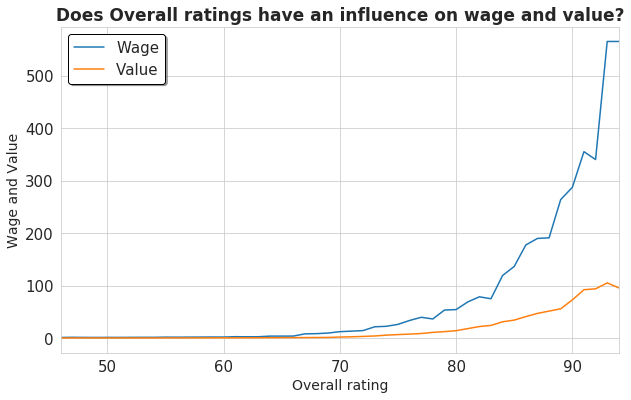

In [71]:

plt.figure(figsize=(10,6))
Wage_Overall.plot(legend=True,fontsize=15)
Value_Overall.plot(legend=True)
plt.title("Does Overall ratings have an influence on wage and value?",fontsize=17,fontweight='bold')
plt.xlabel("Overall rating", fontsize=14)
plt.ylabel("Wage and Value", fontsize=14)
plt.legend(loc=2, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()